Group 21 - Covid Dataset:
Mishaal Usman, Rayyan Jamal, Rohaan Hussain, Rahima Siddiqui, Abbas Raza


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
df = pd.read_csv('owid-covid-data.csv')

total_deaths_per_million    float64
gdp_per_capita              float64
aged_65_older               float64
dtype: object
       total_deaths_per_million  gdp_per_capita  aged_65_older
count             411804.000000   328292.000000  323270.000000
mean                 835.514313    18904.182986       8.684103
std                 1134.932671    19829.578099       6.093193
min                    0.000000      661.240000       1.144000
25%                   24.568000     4227.630000       3.526000
50%                  295.089000    12294.876000       6.293000
75%                 1283.817000    27216.445000      13.928000
max                 6601.110000   116935.600000      27.049000


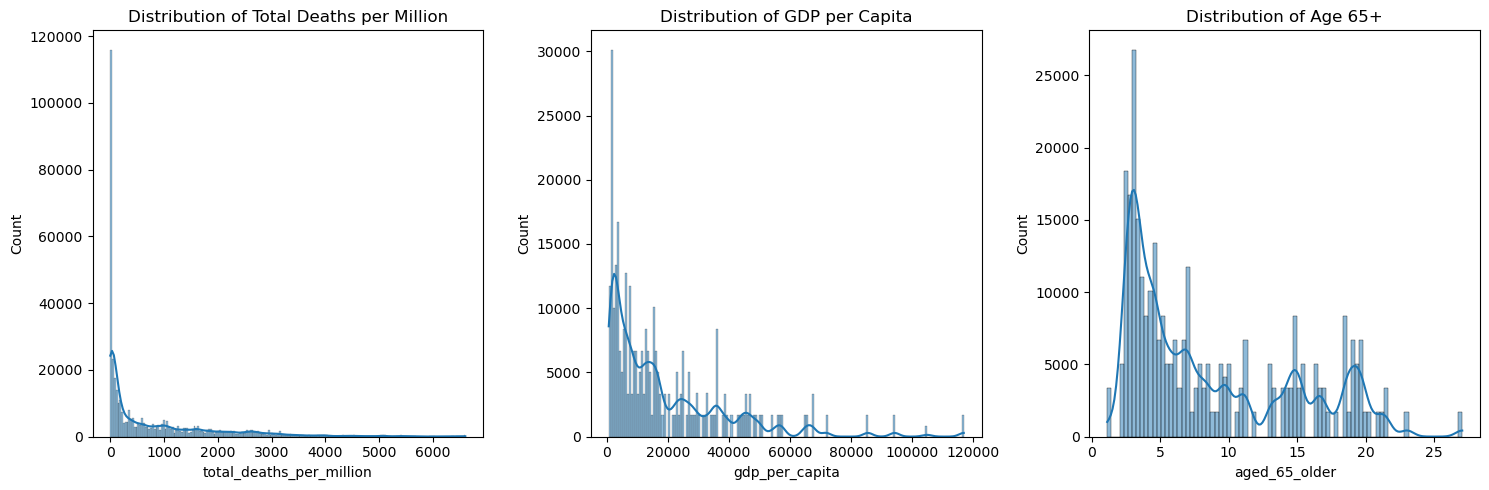

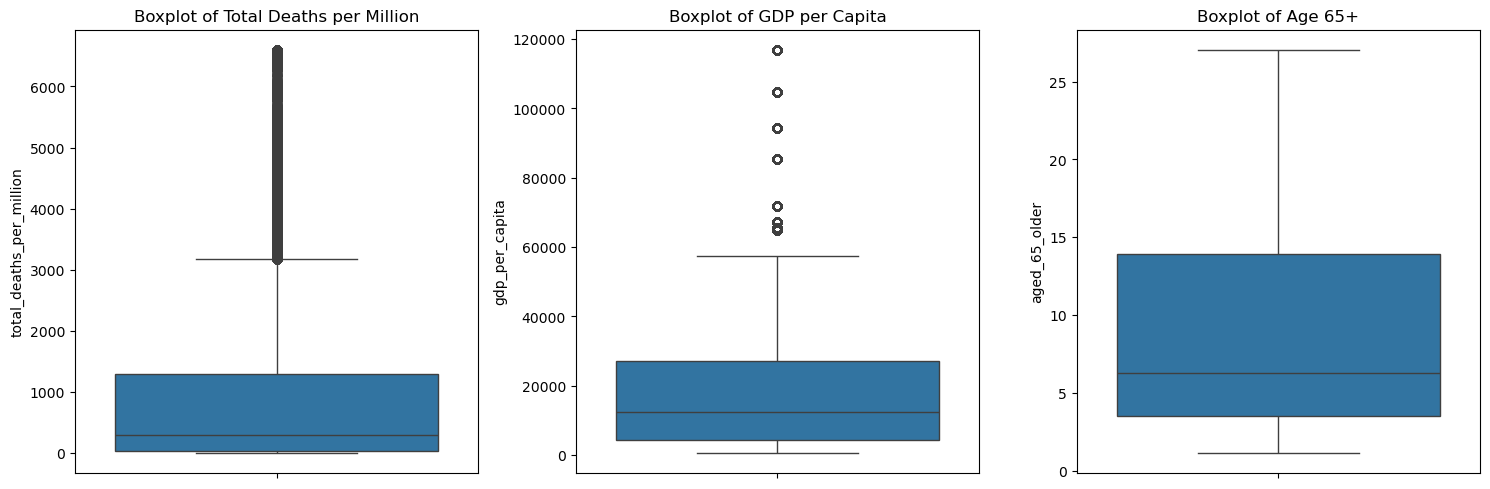

total_deaths_per_million     17631
gdp_per_capita              101143
aged_65_older               106165
dtype: int64
                          total_deaths_per_million  gdp_per_capita  \
total_deaths_per_million                  1.000000        0.208858   
gdp_per_capita                            0.208858        1.000000   
aged_65_older                             0.503209        0.506493   

                          aged_65_older  
total_deaths_per_million       0.503209  
gdp_per_capita                 0.506493  
aged_65_older                  1.000000  


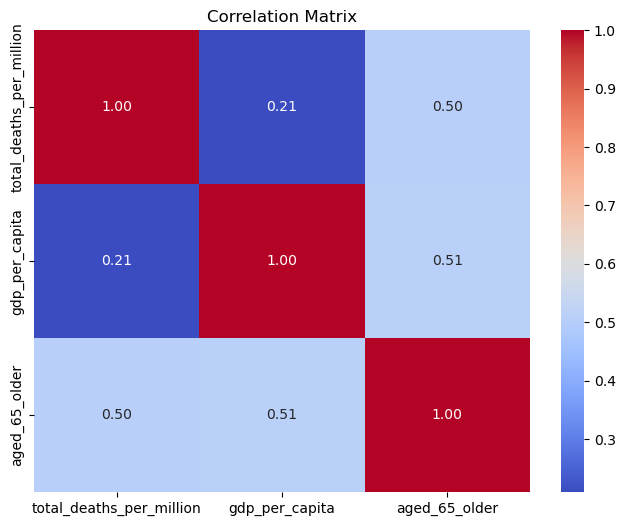

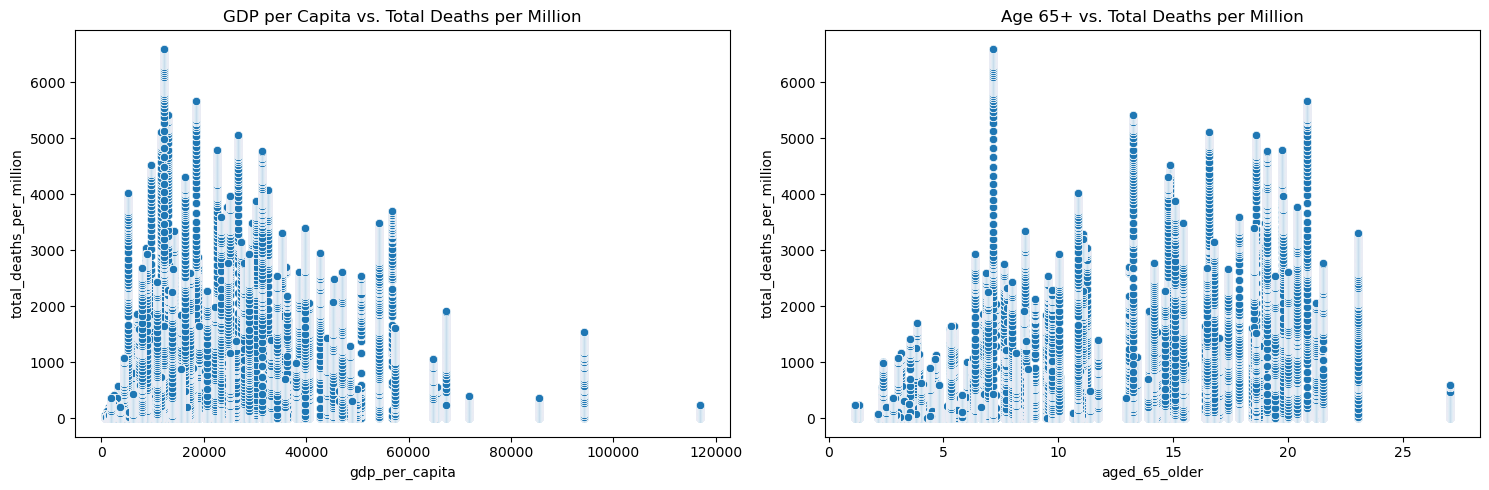

In [3]:

print(df[['total_deaths_per_million', 'gdp_per_capita', 'aged_65_older']].dtypes)
print(df[['total_deaths_per_million', 'gdp_per_capita', 'aged_65_older']].describe())

# Visualize distributions
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['total_deaths_per_million'].dropna(), kde=True)
plt.title('Distribution of Total Deaths per Million')

plt.subplot(1, 3, 2)
sns.histplot(df['gdp_per_capita'].dropna(), kde=True)
plt.title('Distribution of GDP per Capita')

plt.subplot(1, 3, 3)
sns.histplot(df['aged_65_older'].dropna(), kde=True)
plt.title('Distribution of Age 65+')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(y=df['total_deaths_per_million'])
plt.title('Boxplot of Total Deaths per Million')

plt.subplot(1, 3, 2)
sns.boxplot(y=df['gdp_per_capita'])
plt.title('Boxplot of GDP per Capita')

plt.subplot(1, 3, 3)
sns.boxplot(y=df['aged_65_older'])
plt.title('Boxplot of Age 65+')
plt.tight_layout()
plt.show()

print(df[['total_deaths_per_million', 'gdp_per_capita', 'aged_65_older']].isnull().sum())

# Correlation
correlation_matrix = df[['total_deaths_per_million', 'gdp_per_capita', 'aged_65_older']].corr()
print(correlation_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


# Scatter plots
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='gdp_per_capita', y='total_deaths_per_million', data=df)
plt.title('GDP per Capita vs. Total Deaths per Million')
plt.subplot(1, 2, 2)
sns.scatterplot(x='aged_65_older', y='total_deaths_per_million', data=df)
plt.title('Age 65+ vs. Total Deaths per Million')
plt.tight_layout()
plt.show()

total_deaths_per_million    0
gdp_per_capita              0
aged_65_older               0
dtype: int64


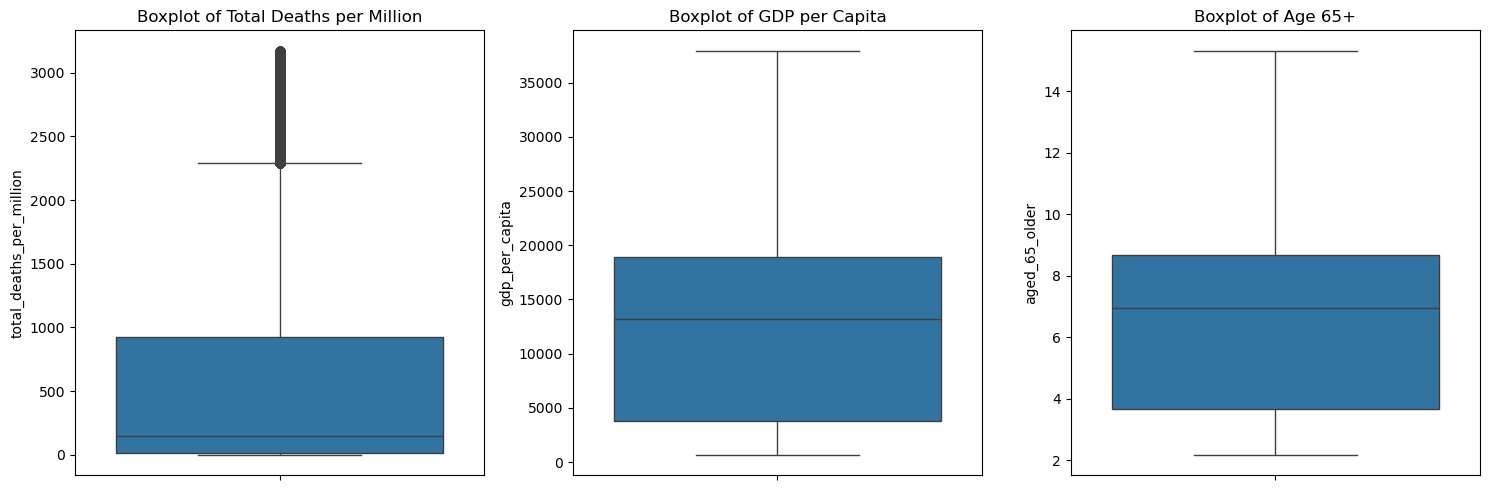

In [4]:
# filling in  missing values
df['gdp_per_capita'] = df['gdp_per_capita'].fillna(df['gdp_per_capita'].mean())
df['aged_65_older'] = df['aged_65_older'].fillna(df['aged_65_older'].mean())
df.dropna(subset=['total_deaths_per_million'], inplace=True)

# removing outliers using IQR 
for col in ['total_deaths_per_million', 'gdp_per_capita', 'aged_65_older']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Data validation
print(df[['total_deaths_per_million', 'gdp_per_capita', 'aged_65_older']].isnull().sum())
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(y=df['total_deaths_per_million'])
plt.title('Boxplot of Total Deaths per Million')

plt.subplot(1, 3, 2)
sns.boxplot(y=df['gdp_per_capita'])
plt.title('Boxplot of GDP per Capita')

plt.subplot(1, 3, 3)
sns.boxplot(y=df['aged_65_older'])
plt.title('Boxplot of Age 65+')
plt.tight_layout()
plt.show()

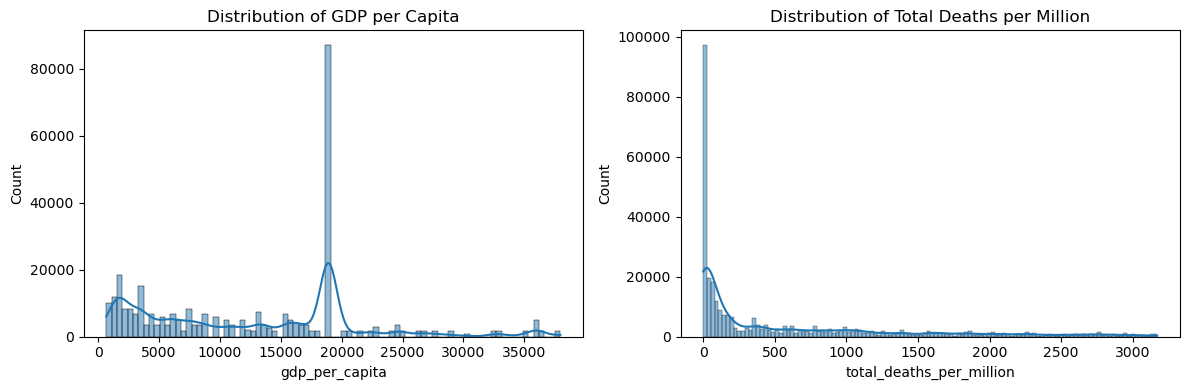

In [5]:
df_model = df[['total_deaths_per_million', 'gdp_per_capita', 'aged_65_older']].copy()
for col in ['total_deaths_per_million', 'gdp_per_capita', 'aged_65_older']:
    df_model[col] = pd.to_numeric(df_model[col], errors='coerce')
    df_model = df_model[df_model[col].notnull()]
    df_model[col] = df_model[col].astype(float)

# applying transformations 
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df_model['gdp_per_capita'], kde=True)
plt.title('Distribution of GDP per Capita')
plt.subplot(1, 2, 2)
sns.histplot(df_model['total_deaths_per_million'], kde=True)
plt.title('Distribution of Total Deaths per Million')
plt.tight_layout()
plt.show()

#Log on gdp and deaths to come closer to normal distribution
df_model['log_gdp_per_capita'] = np.log1p(df_model['gdp_per_capita'])
df_model['log_total_deaths_per_million'] = np.log1p(df_model['total_deaths_per_million'])

In [6]:
# Define features (X) and target (y)
X = df_model[['log_gdp_per_capita', 'aged_65_older']]
y = df_model['log_total_deaths_per_million']

# slitting data into training and testing data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

model = LinearRegression()

# training the model
model.fit(X_train, y_train)

# The coefficients of the model. Beta 1 and Beta 0.
coefficients = pd.DataFrame({'Variable': ['Intercept'] + X_train.columns.tolist(),
                             'Coefficient': [model.intercept_] + model.coef_.tolist()})

# Print coefficients
print(coefficients)

# making predictions
y_pred = model.predict(X_test)

             Variable  Coefficient
0           Intercept    -2.262704
1  log_gdp_per_capita     0.719012
2       aged_65_older     0.036900


In [8]:
# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

R-squared: 0.0981600722039615
Mean Squared Error (MSE): 6.282325807830388
Root Mean Squared Error (RMSE): 2.506456823452259


In [9]:
models = {
    'Ridge': {
        'model': Ridge(),
        'params': {'alpha': [0.1, 1, 10, 100]}
    },
    'RandomForest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
    }
}

results = {}

for model_name, model_data in models.items():
    grid_search = GridSearchCV(model_data['model'], model_data['params'], cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    results[model_name] = {
        'best_params': grid_search.best_params_,
        'r2': r2,
        'mse': mse,
        'rmse': rmse
    }

for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"  Best parameters: {result['best_params']}")
    print(f"  R-squared: {result['r2']}")
    print(f"  MSE: {result['mse']}")
    print(f"  RMSE: {result['rmse']}")

# selecting the best model based on performance
best_model_name = min(results, key=lambda k: results[k]['rmse'])
print(f"\nBest model overall: {best_model_name} (based on lowest RMSE)")

Model: Ridge
  Best parameters: {'alpha': 1}
  R-squared: 0.09816006237311459
  MSE: 6.282325876313254
  RMSE: 2.5064568371135487
Model: RandomForest
  Best parameters: {'max_depth': None, 'n_estimators': 200}
  R-squared: 0.2890532994174645
  MSE: 4.9525405422852975
  RMSE: 2.225430417309267

Best model overall: RandomForest (based on lowest RMSE)


Random forest works best because our variables might not be linearly related so it is able to explain more variance in the data and less error.

RMSE: 0.74
R-squared: 0.92

Feature Importances:
                      Feature  Importance
5            stringency_index    0.422433
0              gdp_per_capita    0.233479
2  hospital_beds_per_thousand    0.099572
1               aged_65_older    0.095916
4          population_density    0.083601
3     human_development_index    0.064998


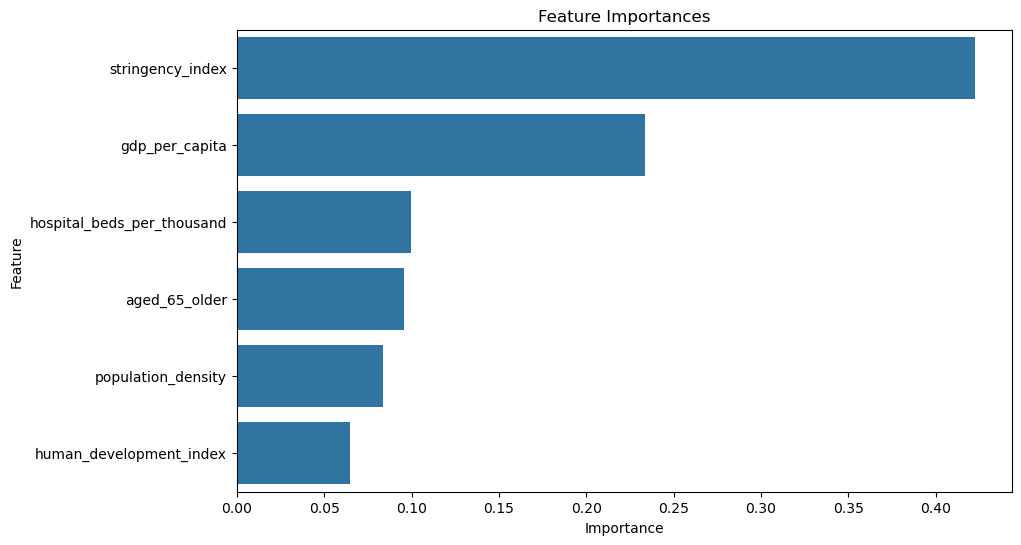

In [11]:
df = pd.read_csv('owid-covid-data.csv')

# selecting relevant features and target variable
features = ['gdp_per_capita', 'aged_65_older',
            'hospital_beds_per_thousand', 'human_development_index',
            'population_density', 'stringency_index']
target = 'total_deaths_per_million'

# Creating a subset of the data with the selected features and target
data = np.log1p(df[[target] + features].dropna())

# splitting into testing and training data 
X_train, X_test, y_train, y_test = train_test_split(
    data[features], data[target], test_size=0.2, random_state=42
)

# training a random forest 
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# making predictions on testing data 
y_pred = model.predict(X_test)

# evaluating the performance of the model 
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

# Get feature importances
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importances:")
print(feature_importance_df)

# Visualize Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.show()